This script is created for predicting the changing of Turkish lira against USD For this purpose Linear regression and Polynomial regression has been conducted. The sum of the Total error has been calculated until degree 100 , after this calculation the best fitted degree has been found which is number 5. To improve this script i will try to figure out how to predict for the rest of the year 2020



In [55]:
print(__doc__)

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures

Automatically created module for IPython interactive environment


Now, we are going to add a path for our data frame and fill all the null or NAN values with the method of ffill data frame might be a xlsx, csv or text file

In [56]:

data = pd.read_excel('USD against Turkish lira.xlsx', delimiter = ',', dtype = float)

data = data.fillna(method = 'ffill')


We have two arrays: the input X and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies

In [57]:
y = np.array(data['Price'])

X= np.arange(1,263)

X = X.reshape(262,1)

y = y.reshape(262,1)

Afterward we are going to split up data into the Training set and Test set, create a linear regression model and fit it using the existing data.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
Lineear_Predict =lin_reg.predict(X)

Visualizing the Linear Regression results and see how the predicted datas and real values look like



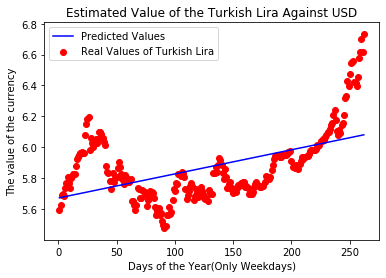

In [59]:

def Get_Linear():
    Real_value_of_TL = plt.scatter(X, y, color='Red')
    Predicted_value = plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Estimated Value of the Turkish Lira Against USD')
    plt.xlabel('Days of the Year(Only Weekdays)')
    plt.ylabel('The value of the currency')

    plt.legend(['Predicted Values','Real Values of Turkish Lira'])
    plt.show()
    return
Get_Linear()

Let us take a look at the slop and the intercept values of the predicted line which is the blue one above. Those value can be called by using below command

In [60]:
model = LinearRegression().fit(X, y)
model.intercept_ = np.array(model.intercept_)
model.coef_ = np.array(model.coef_)
print('intercept: ', model.intercept_)
print('Slope:', model.coef_)
print('The slop function is a first-order equation like f(x) = ax + b, where a is coef_ and b is intercept_ ')
print('The slope function:', model.coef_,'*x +' ,model.intercept_)

intercept:  [5.6709868]
Slope: [[0.0015625]]
The slop function is a first-order equation like f(x) = ax + b, where a is coef_ and b is intercept_ 
The slope function: [[0.0015625]] *x + [5.6709868]


We can see the linear accuracy between real valus and linear predicted values by calculating the sum of difference between real and predicted values after divided up by sum of real values

In [61]:
Linear_Accuracy = []
Linear_Error = 0
for i in range(0,len(X)):
   
    Linear_Error = Linear_Error + abs(float(y[i])-float(Lineear_Predict[i]))
    

Linear_Accuracy.append(Linear_Error)
Linear_Error = 0
    
#print(sum(Linear_Accuracy))
#print(np.mean(y))
Linear_Accuracy = 100 - (Linear_Accuracy/(len(X)*np.mean(y)))*100

In [62]:
Linear_Accuracy

array([97.44980808])

FITTING POLYNOMIAL REGRESSION TO THE DATASET

The same things will be calculated for polynomial regression. It can be seen that the below plot values are mostly scattered so we can increase the accuracy using polynomial regression


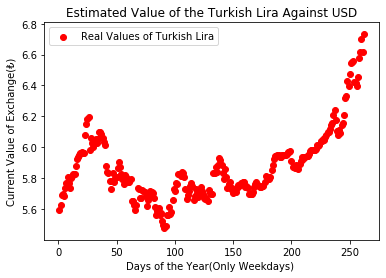

In [63]:
plt.scatter(X,y ,color ='Red')
plt.title('Estimated Value of the Turkish Lira Against USD')
plt.xlabel('Days of the Year(Only Weekdays) ')
plt.ylabel('Current Value of Exchange(₺)')
plt.legend(['Real Values of Turkish Lira'])


Let us take a look at predicted polynomial curve for 2nd, 10th ,20th and 45th order equations

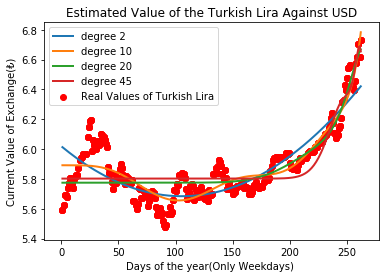

In [64]:
for i in [2,10,20,45]:
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    Poly_Predict = pol_reg.predict(X_poly)
    
    plt.scatter(X, y, color='Red')
    
    plt.plot(X,pol_reg.predict(X_poly) , Linewidth = 2)
    
   
    plt.legend(["degree 2","degree 10","degree 20","degree 45",'Real Values of Turkish Lira'])
plt.title('Estimated Value of the Turkish Lira Against USD')
plt.xlabel('Days of the year(Only Weekdays) ')
plt.ylabel('Current Value of Exchange(₺)')
plt.savefig('Estimated value of the Turkish lira against the USD')
plt.show()

The fitted lines placed on the real values, and its very hard to say something about which curve is the best or which degree is the best? In order to do this we can calculate the sum of deviation between real values and The predicted values divided up by the sum of the real values as we did for linear regression

In [65]:
polynomial_error = 0    
Total_Error =[]    
Accuracy = 0
Total_Accuracy = []
# this loop is used for finding the best polynomial degree for the regression
# we are able to sum all the Error when the degre is 1,2,3 ... etc. 
# then  we can detect the best degree for the regression 
for k in range(0,100):
    poly_reg = PolynomialFeatures(degree=k+1)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    b = pol_reg.predict(X_poly)
    
    for p in range(0,len(X_poly)):
        # The sum of squares between the real currency values(y) and the predicted values(X_poly)
        polynomial_error = polynomial_error + (float(y[p])-float(pol_reg.predict(X_poly)[p]))**2
        Accuracy = Accuracy + abs(float(y[p])-float(pol_reg.predict(X_poly)[p]))
        
    Accuracy = 100- (Accuracy/(len(X)*np.mean(y)))*100
    Total_Accuracy.append(Accuracy)
    Accuracy = 0 
    # print(polinomial_error1)
    Total_Error.append(polynomial_error)
    polynomial_error = 0


In [66]:
Index = Total_Error.index(min(Total_Error))

print(f"The best polynomial degree is {Index}")

Error = Total_Error[Index]


print(f"The total error for degree {Index} is {Error}")

Accuracy_index = Total_Accuracy.index(max(Total_Accuracy))

Accuracy_value =  Total_Accuracy[Index]

print(f"The Accuracy of the system is {Accuracy_value}%")

The best polynomial degree is 5
The total error for degree 5 is 1.4985596182526744
The Accuracy of the system is 98.9683348582985%


Python has calculated the fitted polynomial regression degree for my real values and The accuracy is higher than the linear regression accuracy Linear_Accuracy = 97.44980808 , Polynomial_Accuracy = 98.9683348582985

Let us take a look at the graph for 5th order equation

In [67]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
b = pol_reg.predict(X_poly)

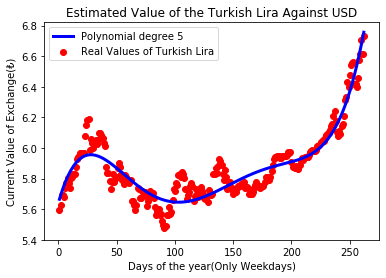

In [68]:
def Get_Polynomial():
    plt.scatter(X, y, color='Red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue', Linewidth = 3)
    plt.title('Estimated Value of the Turkish Lira Against USD')
    plt.xlabel('Days of the year(Only Weekdays)')
    plt.ylabel('Current Value of Exchange(₺)')
    plt.legend(["Polynomial degree 5",'Real Values of Turkish Lira'])
    plt.show()
    return
Get_Polynomial()

Thank you for your patient